<a href="https://colab.research.google.com/github/Ignas12345/Magistro_projektas/blob/main/knygutes/TCGA_miRNR_ir_genu_raisku_palyginimas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [97]:
#galima imti arba normalizuotus skaiciavimus arba ne
url_miRNR = 'https://raw.githubusercontent.com/Ignas12345/Magistro_projektas/refs/heads/main/duomenys/filtered_isoform_read_per_million_RNA_mapped.csv'
mirna_df = pd.read_csv(url_miRNR, )

#url_genai = 'https://raw.githubusercontent.com/Ignas12345/Magistro_projektas/refs/heads/main/duomenys/filtered_gene_expression_counts.csv'
url_genai = 'https://raw.githubusercontent.com/Ignas12345/Magistro_projektas/refs/heads/main/duomenys/fpkm_normalized_filtered_expression_counts.csv'
gene_df = pd.read_csv(url_genai, )

In [98]:
mirna_ids = mirna_df["Unnamed: 0"].to_numpy()
gene_ids = gene_df["gene_id"].to_numpy()
gene_names = gene_df["gene_name"].to_numpy()

In [99]:
columns_to_drop = [
    "source", "type", "gene_id", "gene_name", "gene_type", "score", "phase", "level",
    "hgnc_id", "havana_gene"
]

# Drop the specified columns
gene_df = gene_df.drop(columns=columns_to_drop)
mirna_df = mirna_df.drop(columns=['Unnamed: 0'])

mirna_df.head()

,TCGA-2G-AAG5-01A-11R-A439-13,TCGA-2G-AAG6-01A-11R-A439-13,TCGA-2G-AAGV-01A-11R-A439-13,TCGA-2G-AAGX-01A-11R-A439-13,TCGA-2G-AAGY-01A-11R-A439-13,TCGA-2G-AAGY-05A-11R-A439-13,TCGA-2G-AAEW-01A-11R-A439-13,TCGA-2G-AAEX-01A-11R-A439-13,TCGA-2G-AAF1-01A-11R-A439-13,TCGA-2G-AAF4-01A-11R-A439-13,...,TCGA-YU-AA4L-01A-11R-A43A-13,TCGA-YU-AA61-01A-11R-A43A-13,TCGA-ZM-AA05-01A-12R-A43A-13,TCGA-ZM-AA06-01A-12R-A43A-13,TCGA-ZM-AA0B-01A-11R-A43A-13,TCGA-ZM-AA0D-01A-11R-A43A-13,TCGA-ZM-AA0E-01A-12R-A43A-13,TCGA-ZM-AA0F-01A-21R-A43A-13,TCGA-ZM-AA0H-01A-11R-A43A-13,TCGA-ZM-AA0N-01A-21R-A43A-13
0,8442.150108,9733.713953,8041.494616,14120.154510,6193.217126,6483.152667,6619.132919,7412.830012,7711.910036,6090.723837,...,2832.443917,9104.099446,6668.826594,5451.417069,5148.370818,6938.135815,3701.072497,8413.282384,5926.730879,8547.070595
1,12.655100,7.216914,7.132565,16.142226,14.458626,4.028750,4.294653,3.647631,5.938329,6.816354,...,3.661307,12.330930,8.466788,4.913399,7.076356,9.688443,9.122140,6.207074,11.366958,7.440915
2,8413.761636,9718.890021,7995.290739,14156.171267,6141.420291,6618.339583,6651.745435,7454.356898,7686.786336,6134.410483,...,2854.975041,9138.167594,6618.240226,5416.102006,5147.727513,6837.012697,3620.860572,8343.205428,5898.060892,8565.037680
3,25.652234,20.480429,10.541048,52.718828,46.076938,2.685833,1.744703,2.525284,1.370384,3.408178,...,0.000000,12.251886,4.072632,7.063012,1.929915,1.362437,1.572782,4.138050,3.788986,3.992685
4,2.223193,1.267835,1.388641,3.452383,5.719896,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [100]:
gene_df.columns = [
    col[:16] for col in gene_df.columns
]
mirna_df.columns = [
    col[:16] for col in mirna_df.columns
]

mirna_df = mirna_df.loc[:, gene_df.columns]
mirna_df.head()

,TCGA-2G-AAG5-01A,TCGA-2G-AAG6-01A,TCGA-2G-AAGY-01A,TCGA-2G-AAGY-05A,TCGA-2G-AAGV-01A,TCGA-2G-AAGX-01A,TCGA-2G-AAFE-01A,TCGA-2G-AAGA-01A,TCGA-ZM-AA05-01A,TCGA-2G-AAKD-01A,...,TCGA-WZ-A7V3-01A,TCGA-2G-AAH3-01A,TCGA-4K-AA1I-01A,TCGA-S6-A8JX-01A,TCGA-SO-A8JP-01A,TCGA-2G-AAFZ-01A,TCGA-XE-AANR-01A,TCGA-XE-AAOJ-01A,TCGA-2G-AAHG-01A,TCGA-2G-AAGP-01A
0,8442.150108,9733.713953,6193.217126,6483.152667,8041.494616,14120.154510,7449.903730,10857.030495,6668.826594,5326.042894,...,3016.874632,5288.924756,6511.309011,3489.813301,4250.392324,8922.004191,6176.535569,5059.487475,4532.598597,10201.482639
1,12.655100,7.216914,14.458626,4.028750,7.132565,16.142226,8.014657,8.679639,8.466788,4.812577,...,7.977984,5.661557,6.656542,5.779309,7.454586,6.651703,11.719850,16.640065,5.458433,17.605433
2,8413.761636,9718.890021,6141.420291,6618.339583,7995.290739,14156.171267,7403.493271,10794.477239,6618.240226,5263.479380,...,2993.339580,5292.870690,6385.439839,3634.740580,4259.124838,8910.918018,6138.577248,5034.829925,4500.267882,10164.828702
3,25.652234,20.480429,46.076938,2.685833,10.541048,52.718828,2.423036,8.081043,4.072632,3.701983,...,1.994495,3.602809,7.261683,5.334746,5.537692,5.321363,8.221387,23.598637,2.939156,15.585138
4,2.223193,1.267835,5.719896,0.000000,1.388641,3.452383,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [101]:
mirna_ids

array(['hsa-let-7a-1, mature,MIMAT0000062',
       'hsa-let-7a-1, mature,MIMAT0004481',
       'hsa-let-7a-2, mature,MIMAT0000062',
       'hsa-let-7a-2, mature,MIMAT0010195', 'hsa-let-7a-2, precursor',
       'hsa-let-7a-3, mature,MIMAT0000062',
       'hsa-let-7a-3, mature,MIMAT0004481',
       'hsa-let-7b, mature,MIMAT0000063',
       'hsa-let-7b, mature,MIMAT0004482',
       'hsa-let-7c, mature,MIMAT0000064',
       'hsa-let-7c, mature,MIMAT0026472',
       'hsa-let-7d, mature,MIMAT0000065',
       'hsa-let-7d, mature,MIMAT0004484',
       'hsa-let-7e, mature,MIMAT0000066',
       'hsa-let-7e, mature,MIMAT0004485',
       'hsa-let-7f-1, mature,MIMAT0000067',
       'hsa-let-7f-1, mature,MIMAT0004486',
       'hsa-let-7f-2, mature,MIMAT0000067', 'hsa-let-7f-2, precursor',
       'hsa-let-7g, mature,MIMAT0000414',
       'hsa-let-7g, mature,MIMAT0004584',
       'hsa-let-7i, mature,MIMAT0000415',
       'hsa-let-7i, mature,MIMAT0004585',
       'hsa-mir-1-1, mature,MIMAT0000416',
   

In [139]:
mirna_name = 'hsa-mir-371a, mature,MIMAT0000723'
gene_name = 'BACE1'

x_data = mirna_df.iloc[np.where(mirna_ids == mirna_name)].to_numpy()[0,:]
y_data = gene_df.iloc[np.where(gene_names == gene_name)].to_numpy()[0,:]

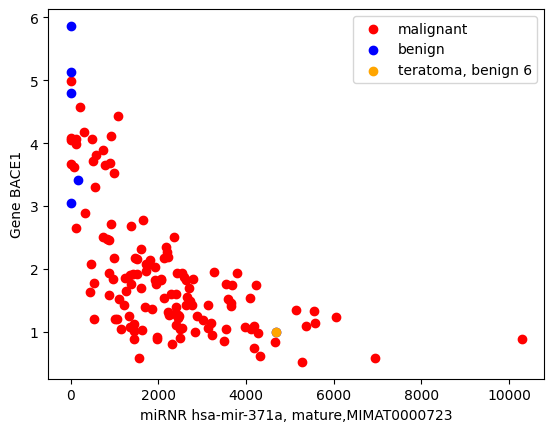

In [140]:
plt.scatter(x_data[6:139], y_data[6:139], c = 'r', label = 'malignant')
plt.scatter(x_data[0:6], y_data[0:6], c = 'b', label = 'benign')
plt.scatter(x_data[3], y_data[3], c = 'orange', label = 'teratoma, benign 6')
plt.legend()
plt.xlabel('miRNR ' + mirna_name)
plt.ylabel('Gene ' + gene_name)
plt.show()